In [1]:
%matplotlib inline

In [2]:
import pandas as pd
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import json
from datadict import SOL
from stolen import equi
from operator import itemgetter
pd.set_option('display.width', 100)

In [3]:
probes = {d['id']: d for d in json.load(open('20170130.json'))['objects']}

In [4]:
dat = pd.read_csv('./uniq_speedy_probes.txt', names='msm_id prb_id src srclat srclon dst dstlat dstlon distance light rtt first'.split(), sep=' ')

In [5]:
dat.head()

,msm_id,prb_id,src,srclat,srclon,dst,dstlat,dstlon,distance,light,rtt,first
0,1042408,10007,76.103.162.14,38.3305,-122.3325,80.94.66.70,40.7095,-74.0115,4100,39.6,14.635000,NaN
1,1446417,1001,114.198.116.142,38.9775,-76.4925,120.29.255.85,-37.8105,144.9595,16431,158.9,30.968000,1.213
2,1963440,1001,114.198.116.142,38.9775,-76.4925,203.133.248.18,-27.4705,153.0295,15295,147.9,36.978440,NaN
3,1963440,1001,114.198.118.192,38.9775,-76.4925,203.133.248.18,-27.4705,153.0295,15295,147.9,34.465544,NaN
4,1446417,1001,121.45.196.112,38.9775,-76.4925,120.29.255.85,-37.8105,144.9595,16431,158.9,27.842000,1.203


In [6]:
def plotprob(src_prb_id):
    fig = plt.figure(figsize=(20, 12))
    ax = fig.add_axes([0.1,0.1,0.8,0.8])
    # setup mercator map projection.
    m = Basemap(llcrnrlon=-170., llcrnrlat=-60., urcrnrlon=170., urcrnrlat=84.,
                rsphere=(6378137.00,6356752.3142),
                resolution='l', projection='merc',
                lat_0=0., lon_0=0., lat_ts=20.)
    src_dat = dat[dat.prb_id == src_prb_id].sort_values(['distance', 'msm_id'])
    print 'https://atlas.ripe.net/probes/{}/'.format(src_prb_id)
    print itemgetter('is_public', 'address_v4', 'prefix_v4', 'latitude', 'longitude')(probes[src_prb_id])
    print src_dat['msm_id src dst rtt light distance dstlat dstlon'.split()]
    for row in src_dat.itertuples():
        m.drawgreatcircle(row.srclon, row.srclat, row.dstlon, row.dstlat, linewidth=1, color='b')
        equi(m, row.dstlon, row.dstlat, row.distance / 5) # ugly hack for visualisation
    m.drawcoastlines()
    ax.set_title('From probe #{:d}'.format(src_prb_id))
    plt.show()

In [7]:
vc = dat.prb_id.value_counts()
vc.head(15)

10790    33
1001     10
13526    10
16018    10
10125     8
13521     8
2592      7
14635     6
3187      6
19712     6
17958     5
1419      4
4825      4
23333     4
3185      4
Name: prb_id, dtype: int64

https://atlas.ripe.net/probes/10790/
(True, u'108.41.158.66', u'108.41.0.0/16', 39.7375, -104.9785)
     msm_id             src              dst       rtt  light  distance   dstlat   dstlon
67  7291400   108.41.158.66    185.28.222.65   9.41400   22.8      2354  39.0395 -77.4905
89  2339854  108.54.119.210  199.115.158.230   8.29935   22.8      2357  39.0175 -77.4605
71  7291275   108.41.158.66   198.180.150.39   9.51100   22.8      2357  39.0215 -77.4605
72  7291278   108.41.158.66  199.115.158.230   9.30800   22.8      2357  39.0175 -77.4605
73  7291381   108.41.158.66   199.168.88.229   9.80000   22.8      2357  39.0205 -77.4625
87  7291430   108.41.158.66    74.122.110.46   9.45700   22.8      2357  39.0205 -77.4615
81  7291533   108.41.158.66   63.221.242.138   9.26700   22.9      2364  38.9815 -77.3795
78  7291178   108.41.158.66      38.103.8.29   9.46600   22.9      2365  38.9575 -77.3825
68  7291581   108.41.158.66     192.0.44.210  10.23600   22.9      2366  38.9515 -77.3625


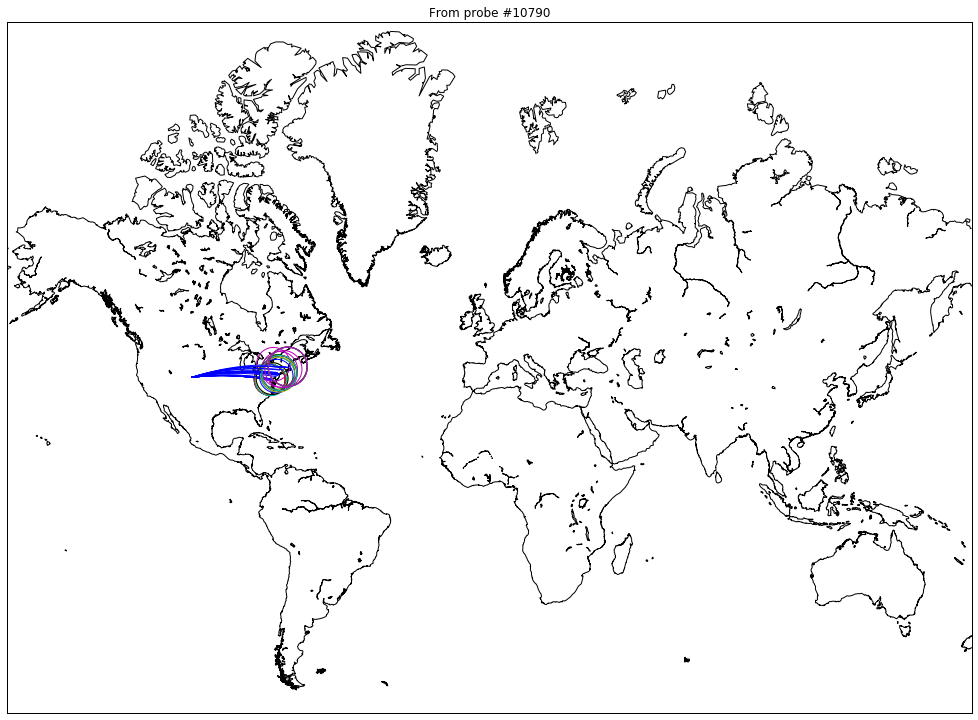

https://atlas.ripe.net/probes/1001/
(True, u'108.3.164.129', u'108.3.128.0/17', 38.9775, -76.4925)
     msm_id              src             dst        rtt  light  distance   dstlat    dstlon
2   1963440  114.198.116.142  203.133.248.18  36.978440  147.9     15295 -27.4705  153.0295
3   1963440  114.198.118.192  203.133.248.18  34.465544  147.9     15295 -27.4705  153.0295
1   1446417  114.198.116.142   120.29.255.85  30.968000  158.9     16431 -37.8105  144.9595
4   1446417   121.45.196.112   120.29.255.85  27.842000  158.9     16431 -37.8105  144.9595
5   1446417    121.45.197.38   120.29.255.85  27.521000  158.9     16431 -37.8105  144.9595
8   1446417    121.45.207.29   120.29.255.85  26.725000  158.9     16431 -37.8105  144.9595
10  1446417  124.168.209.113   120.29.255.85  30.727000  158.9     16431 -37.8105  144.9595
6   1446418    121.45.202.68   120.29.255.85  41.655000  158.9     16431 -37.8105  144.9595
7   1446418    121.45.204.42   120.29.255.85  27.079000  158.9     16431 

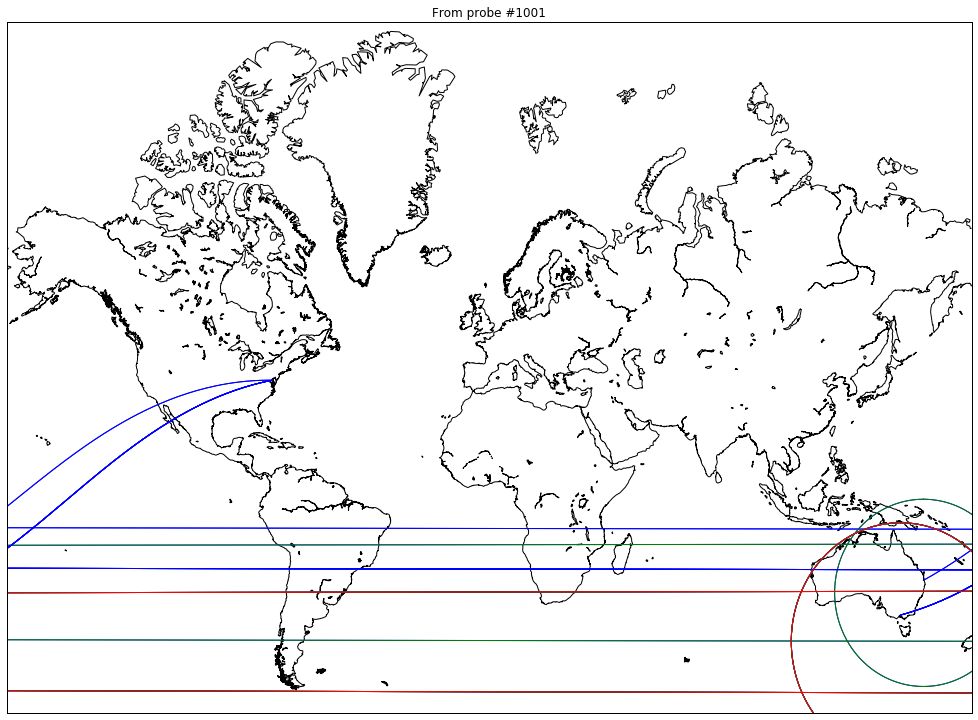

https://atlas.ripe.net/probes/13526/
(False, None, u'208.69.34.0/24', 37.7705, -122.3915)
      msm_id           src             dst        rtt  light  distance   dstlat   dstlon
269  1790333  208.69.34.98  195.66.241.220   1.378515   83.3      8618  51.4975  -0.0885
268  7710423  208.69.34.98    185.73.44.30   0.475165   83.4      8621  51.5075  -0.0015
264  1790203  208.69.34.69      5.57.17.65   9.110000   84.8      8770  52.3515   4.8315
262  1880334  208.69.34.69   130.89.144.98   9.155000   85.7      8867  52.2385   6.8575
263  2318322  208.69.34.69  178.248.208.70   7.176210   86.5      8950  48.8815   2.3505
271  3067858  208.69.34.98   94.79.177.226  28.151135   86.9      8992  51.7215   8.7515
267  3321322  208.69.34.98   185.28.156.14  12.677000   89.9      9293  49.4475  11.0805
270  7710420  208.69.34.98    77.95.70.166  17.569435   90.3      9335  45.7815   4.8585
265  1789562  208.69.34.69   91.239.97.134  33.617040   94.1      9731  46.1695  14.3315
266  3417786  208.69

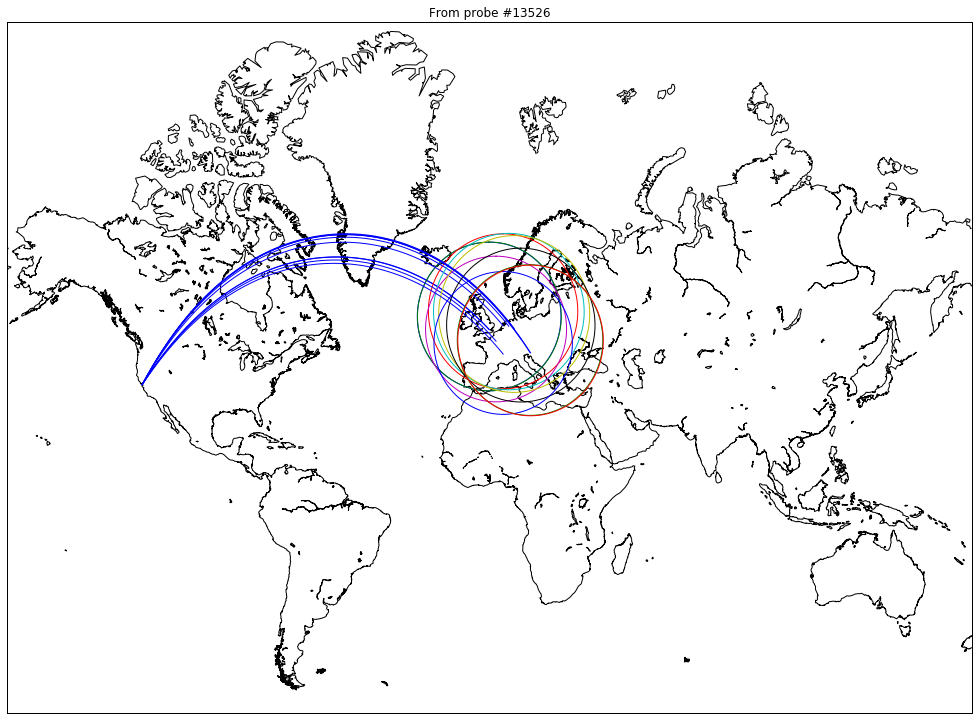

https://atlas.ripe.net/probes/16018/
(True, u'66.96.199.42', u'66.96.199.0/24', 1.2915, 103.8575)
      msm_id            src             dst       rtt  light  distance   dstlat   dstlon
411  1696927  31.52.212.103   185.27.112.25  36.96500   96.5      9981  55.7315  12.3805
413  1696927   5.80.239.212   185.27.112.25  25.76900   96.5      9981  55.7315  12.3805
420  1696927   86.148.68.29   185.27.112.25  33.50700   96.5      9981  55.7315  12.3805
415  1696928   5.80.255.225   185.27.112.25  28.45100   96.5      9981  55.7315  12.3805
418  1696928   81.141.13.42   185.27.112.25  29.13300   96.5      9981  55.7315  12.3805
419  1696928  81.141.15.213   185.27.112.25  29.53000   96.5      9981  55.7315  12.3805
416  1698327     5.80.29.37  143.129.80.132  20.75100  102.0     10551  51.1775   4.4205
412  1698328   5.80.239.212  143.129.80.132  17.01522  102.0     10551  51.1775   4.4205
414  1698328   5.80.255.122  143.129.80.132  17.63100  102.0     10551  51.1775   4.4205
417  1698328

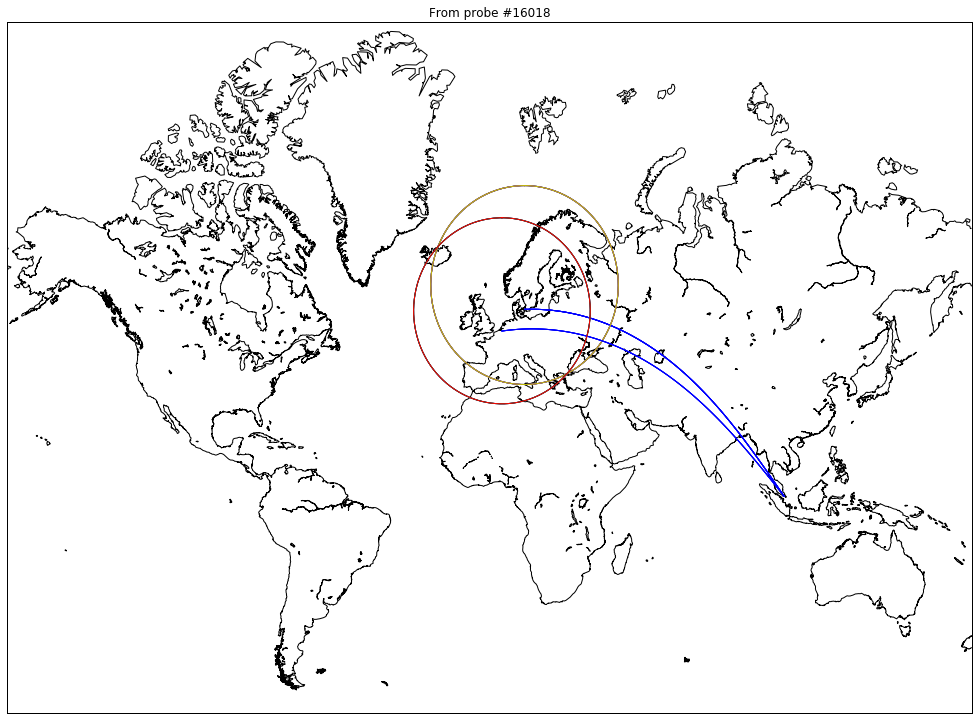

https://atlas.ripe.net/probes/10125/
(True, u'173.226.66.172', u'173.226.0.0/15', 37.0895, -95.7115)
     msm_id             src              dst    rtt  light  distance   dstlat   dstlon
22  7291226  173.226.66.172   107.77.203.232  6.052   15.1      1562  37.6505 -78.0225
27  7291200  173.226.66.172    208.80.155.69  4.495   15.5      1607  39.0385 -77.4885
29  7291208  173.226.66.172    85.184.244.14  4.293   15.5      1607  39.0415 -77.4895
25  7291275  173.226.66.172   198.180.150.39  6.862   15.6      1609  39.0215 -77.4605
26  7291278  173.226.66.172  199.115.158.230  4.489   15.6      1609  39.0175 -77.4605
28  7291178  173.226.66.172      38.103.8.29  5.241   15.6      1616  38.9575 -77.3825
23  7749347  173.226.66.172      108.59.15.3  4.710   15.9      1647  38.8995 -77.0205
24  7291179  173.226.66.172    128.8.128.197  5.844   16.0      1654  38.9915 -76.9395


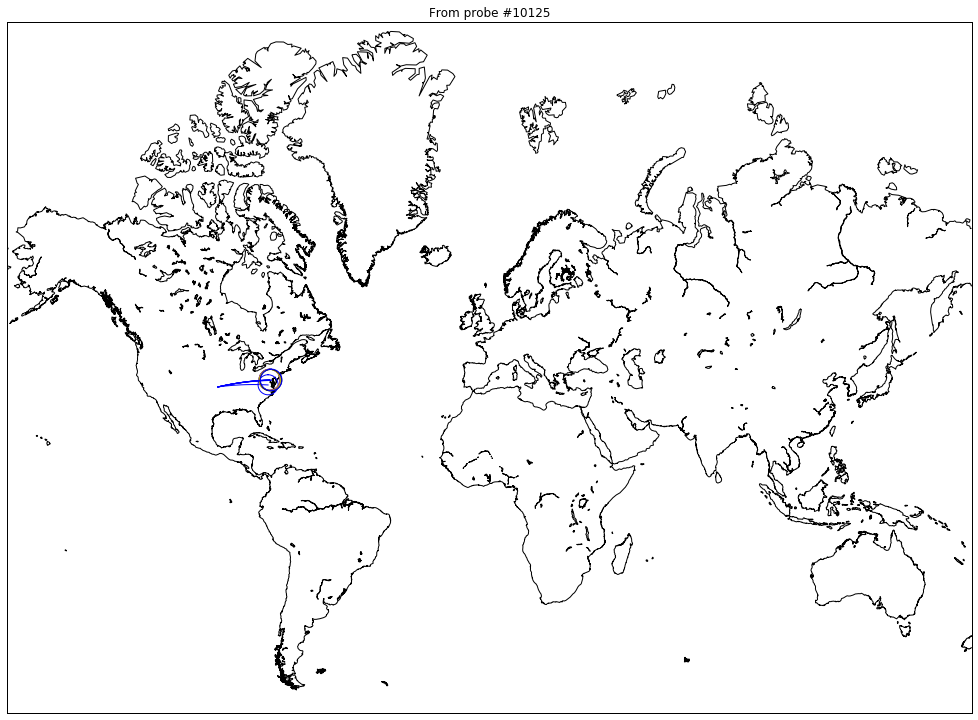

https://atlas.ripe.net/probes/13521/
(False, None, u'208.69.35.0/24', 37.7675, -122.3915)
      msm_id           src              dst        rtt  light  distance   dstlat   dstlon
258  1885418  208.69.35.69  193.242.111.147  33.351470   79.0      8169  53.3175  -6.4425
256  1835746  208.69.35.69     188.95.32.34  24.897000   83.3      8617  59.3485  17.9775
259  7710423  208.69.35.97     185.73.44.30   7.495535   83.4      8621  51.5075  -0.0015
257  1026399  208.69.35.69     193.0.19.107   1.780000   84.8      8772  52.3675   4.8875
254  1880334  208.69.35.69    130.89.144.98   4.273000   85.7      8867  52.2385   6.8575
253  1663325  208.69.35.69  130.104.229.249   6.657000   86.1      8904  50.6715   4.6095
255  1843813  208.69.35.69  149.219.196.254  11.346275   86.9      8985  50.9395   6.9575
260  7710420  208.69.35.97     77.95.70.166  20.816590   90.3      9335  45.7815   4.8585


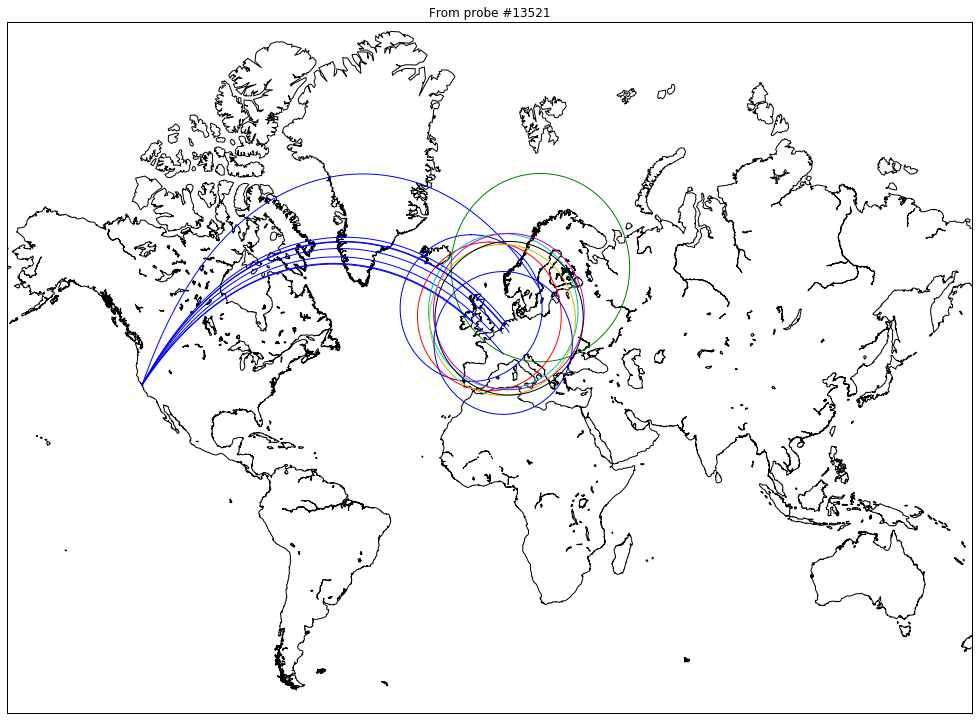

https://atlas.ripe.net/probes/2592/
(True, u'174.61.236.26', u'174.48.0.0/12', 47.6085, -122.3285)
      msm_id             src             dst     rtt  light  distance   dstlat    dstlon
806  1618361  121.44.134.181  203.133.248.56  36.647  114.5     11847 -27.4705  153.0295
807  1618361  121.44.158.176  203.133.248.56  35.922  114.5     11847 -27.4705  153.0295
809  1618361  121.44.225.123  203.133.248.56  36.511  114.5     11847 -27.4705  153.0295
810  1618361  121.44.240.174  203.133.248.56  36.685  114.5     11847 -27.4705  153.0295
811  1618361    121.44.96.79  203.133.248.56  39.178  114.5     11847 -27.4705  153.0295
812  1618361   121.45.181.39  203.133.248.56  35.875  114.5     11847 -27.4705  153.0295
808  1963440   121.44.223.63  203.133.248.18  36.844  114.5     11847 -27.4705  153.0295


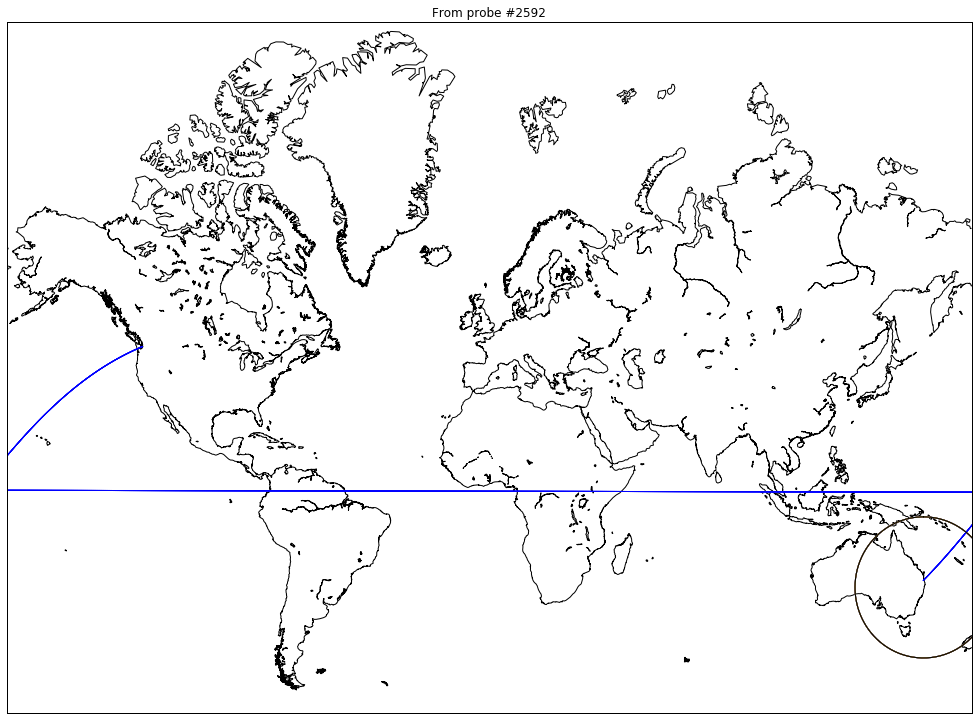

https://atlas.ripe.net/probes/14635/
(True, u'189.6.250.80', u'189.6.224.0/19', -30.0205, -51.1915)
      msm_id             src           dst     rtt  light  distance   dstlat   dstlon
350  1637583     77.4.210.91  88.86.97.154  33.443  106.4     11000  50.0805  14.5295
351  1637583     77.4.90.150  88.86.97.154  27.452  106.4     11000  50.0805  14.5295
352  1637583    93.133.81.91  88.86.97.154  33.550  106.4     11000  50.0805  14.5295
353  1637583    93.133.85.26  88.86.97.154  29.664  106.4     11000  50.0805  14.5295
354  1637583   93.134.185.42  88.86.97.154  42.509  106.4     11000  50.0805  14.5295
355  1637583  93.134.232.178  88.86.97.154  33.512  106.4     11000  50.0805  14.5295


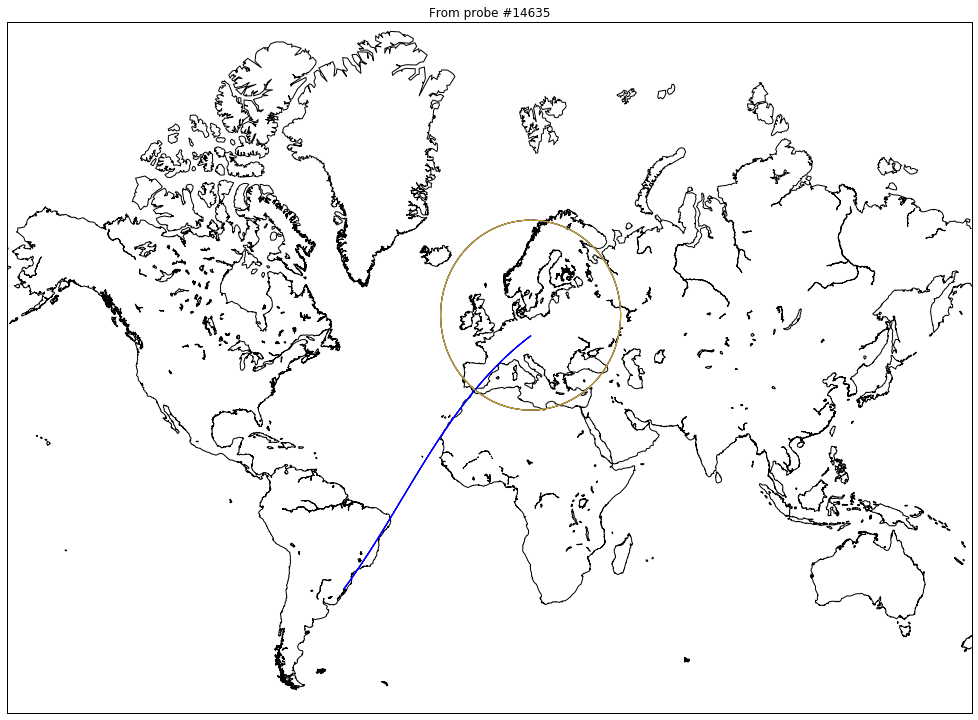

https://atlas.ripe.net/probes/3187/
(True, u'85.179.181.198', u'85.176.0.0/13', 53.5405, 10.2215)
      msm_id            src          dst        rtt  light  distance   dstlat   dstlon
945  1042417   78.51.197.40  80.94.66.74  25.902000   59.4      6144  40.7095 -74.0115
946  1042417  78.51.236.216  80.94.66.74  25.905000   59.4      6144  40.7095 -74.0115
944  1042418   78.51.115.25  80.94.66.74  25.027589   59.4      6144  40.7095 -74.0115
947  1042418  78.51.237.254  80.94.66.74  27.929000   59.4      6144  40.7095 -74.0115
948  1042418   78.51.53.214  80.94.66.74  25.099000   59.4      6144  40.7095 -74.0115
949  1042418  92.230.43.229  80.94.66.74  24.920837   59.4      6144  40.7095 -74.0115


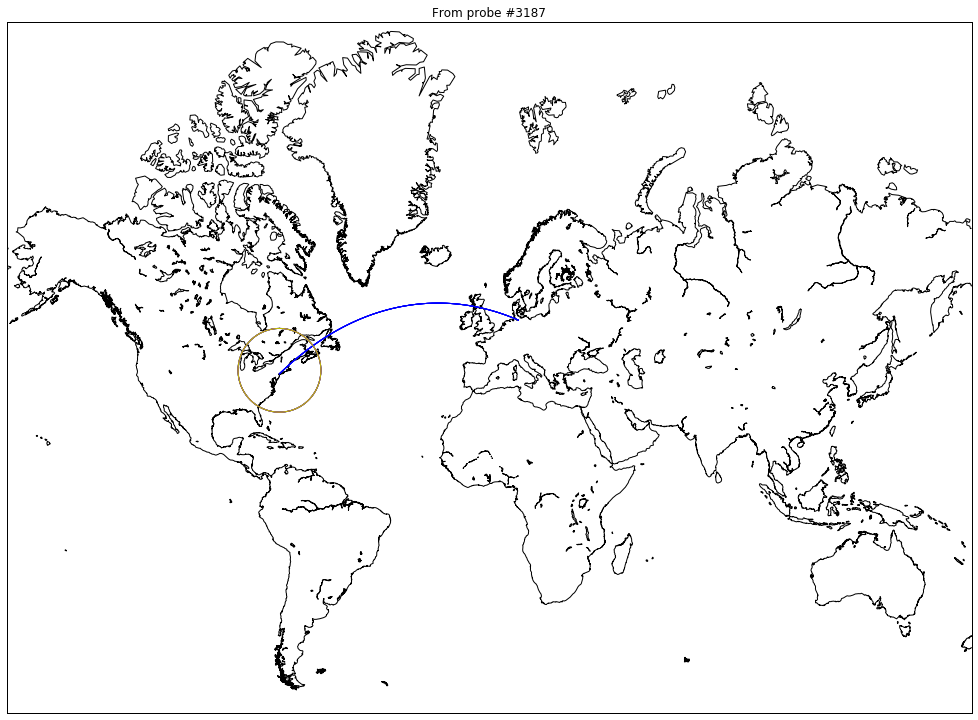

https://atlas.ripe.net/probes/19712/
(True, u'113.197.2.35', u'113.197.0.0/20', -27.5615, 153.0775)
      msm_id             src             dst    rtt  light  distance   dstlat    dstlon
553  7306846  144.138.197.91  202.68.162.226  2.751    7.0       724 -33.8725  151.2105
551  7306849  144.138.197.91    138.44.16.50  2.879    7.0       725 -33.8815  151.1975
552  7306859  144.138.197.91  180.235.104.53  3.431    7.0       725 -33.8815  151.1975
550  7306898  144.138.197.91  103.52.116.202  3.038    7.0       728 -33.9105  151.1905
554  7306912  144.138.197.91  203.217.162.30  2.794    7.0       728 -33.9095  151.1885
549  7306911  144.138.197.91     103.28.72.9  2.683    7.1       730 -33.9325  151.1985


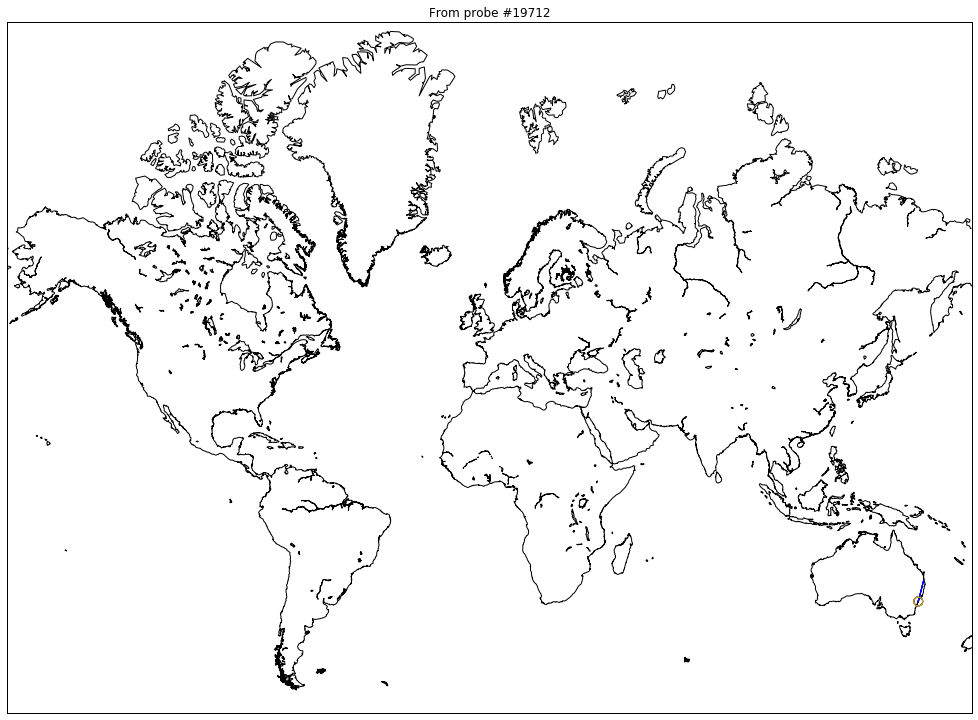

https://atlas.ripe.net/probes/17958/
(False, None, u'176.24.0.0/14', 51.0415, -2.8305)
      msm_id              src            dst        rtt  light  distance   dstlat   dstlon
464  3484660  151.226.188.224  217.10.140.74   6.754555   52.3      5406  40.7205 -74.0115
465  3484660    176.24.212.35  217.10.140.74   9.744455   52.3      5406  40.7205 -74.0115
466  3484660   188.222.29.112  217.10.140.74  10.061895   52.3      5406  40.7205 -74.0115
467  3484660   188.222.30.239  217.10.140.74   9.639510   52.3      5406  40.7205 -74.0115
468  3484660   94.193.233.159  217.10.140.74   6.827165   52.3      5406  40.7205 -74.0115


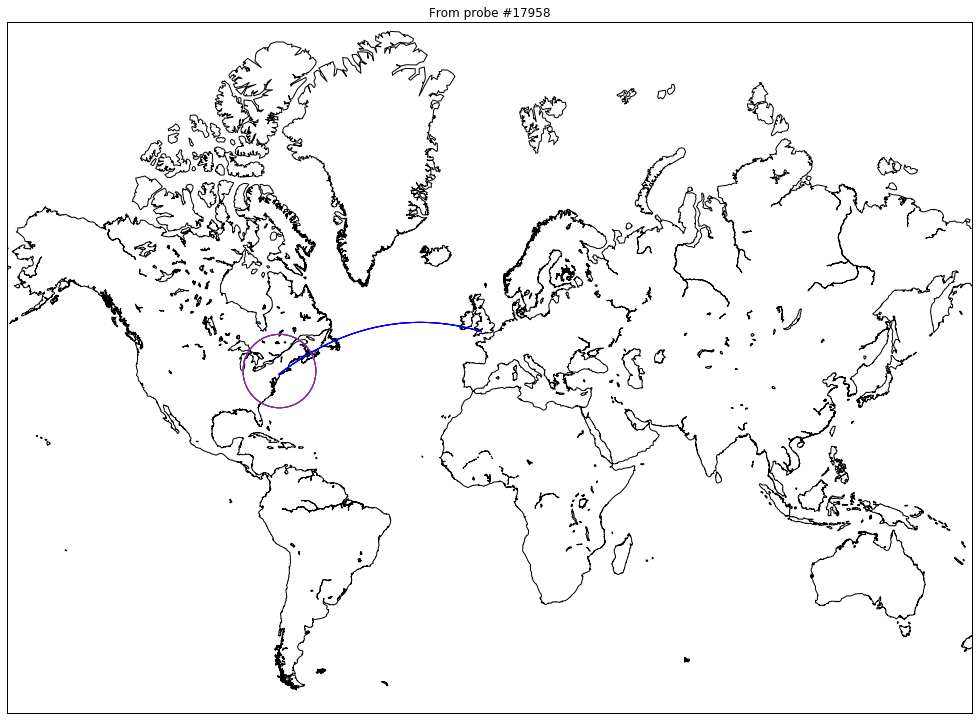

In [8]:
for no in vc[vc >= 5].index:
    plotprob(no)